In [2]:
from zipfile import ZipFile

file_name = "/content/klasifikasi sampah.zip"

with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

print('Done')

Done


In [3]:
pip install split-folders

In [4]:

import splitfolders, os
if not os.path.exists('data/train'):
    splitfolders.ratio('DATASETS', output='data', seed=42, ratio=(.7, .2, .1))
    print('Dataset berhasil dipisah')
else:
    print('Dataset sudah ada')


Copying files: 7014 files [00:01, 5404.90 files/s]

Dataset berhasil dipisah


In [5]:

import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print('Kelas:', class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)


Found 4907 files belonging to 6 classes.
Found 1401 files belonging to 6 classes.
Found 706 files belonging to 6 classes.
Kelas: ['Kaca', 'Kardus', 'Kertas', 'Logam', 'Plastik', 'Residu']


In [6]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.3555 - loss: 1.6651 - val_accuracy: 0.5446 - val_loss: 1.1971
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.5072 - loss: 1.2560 - val_accuracy: 0.5503 - val_loss: 1.1358
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.5376 - loss: 1.1795 - val_accuracy: 0.5917 - val_loss: 1.0551
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.5665 - loss: 1.1027 - val_accuracy: 0.6024 - val_loss: 1.0498
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.5887 - loss: 1.0532 - val_accuracy: 0.6167 - val_loss: 1.0007
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.5891 - loss: 1.0245 - val_accuracy: 0.6210 - val_loss: 0.9759
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.6204 - loss: 0.9988 - val_accuracy: 0.6196 - val_loss: 0.9738
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.6351 - loss: 0.9396 - val_accu

In [8]:
#loss
loss, acc = model.evaluate(test_ds)
print(f'Akurasi Test: {acc*100:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1625 - loss: 2.0663
Akurasi Test: 14.59%


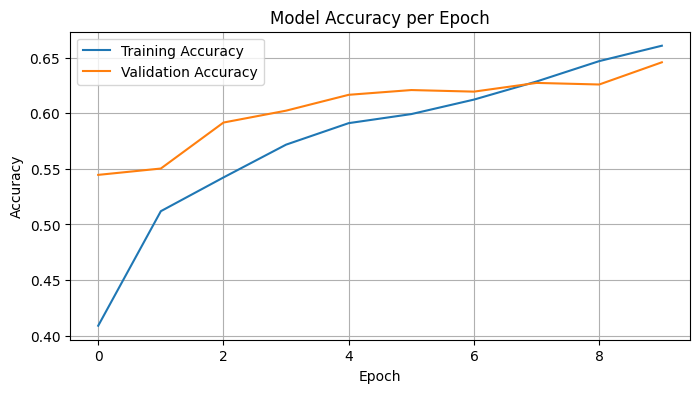

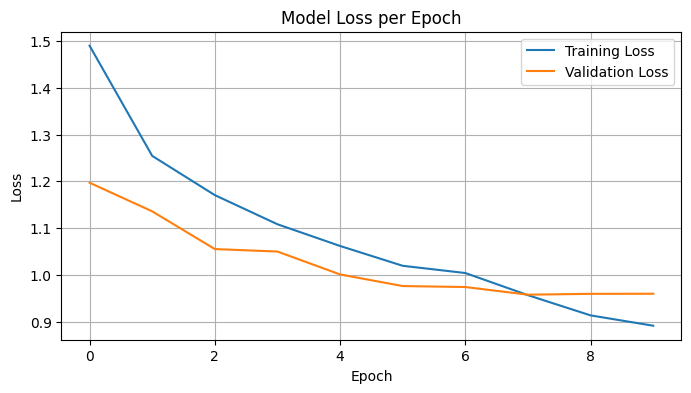

In [11]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('learning_curve_akurasi.png')
plt.show()

# Grafik Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('learning_curve_loss.png')
plt.show()

In [13]:

from PIL import Image
import numpy as np

def predict_image(image_path):
    img = Image.open(image_path).resize(IMG_SIZE)
    img_array = np.expand_dims(img, axis=0)/255.0
    pred = model.predict(img_array)
    idx = np.argmax(pred)
    return class_names[idx], pred[0][idx]

# Contoh:
# label, prob = predict_image('path_ke_gambar_baru.jpg')
# print(f'Prediksi: {label} ({prob*100:.2f}%)')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


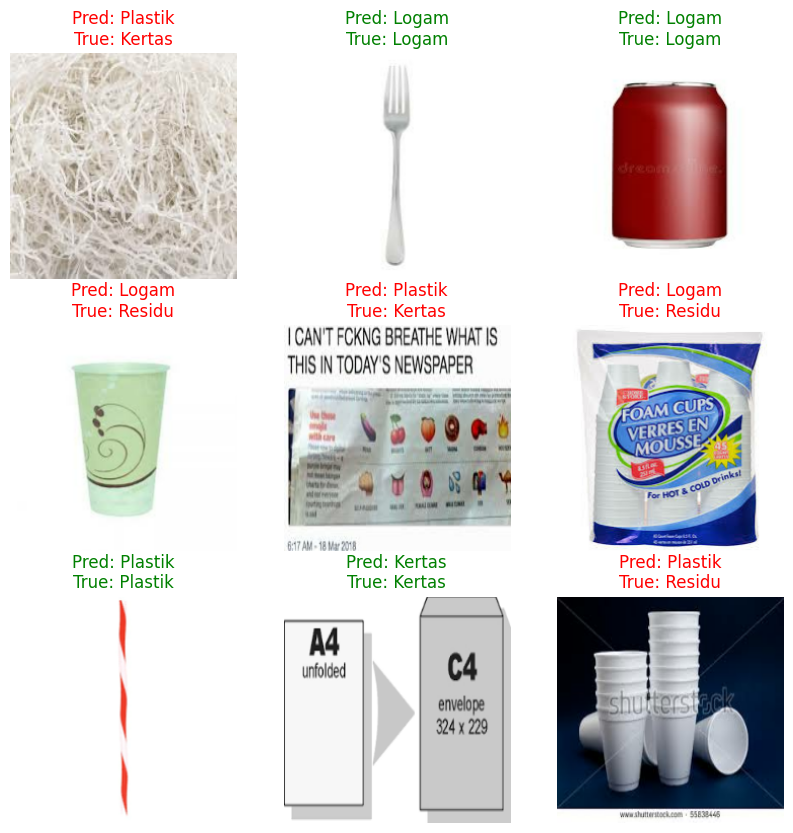

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        pred_label = class_names[np.argmax(preds[i])]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis("off")

In [15]:
model.save('model_sampah.h5')
print('Model disimpan sebagai model_sampah.h5')

Model disimpan sebagai model_sampah.h5


In [16]:
# Install library
!pip install gradio tensorflow pillow

In [17]:
import tensorflow as tf
import gradio as gr
import numpy as np
from PIL import Image

# Upload file .h5
model = tf.keras.models.load_model("/content/model_sampah.h5")

# Fungsi untuk memproses dan memprediksi gambar
def predict_image(img):
    img = img.resize((224, 224)).convert('RGB')
    img_array = np.array(img) / 255.0
    img_tensor = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_tensor)
    class_id = int(np.argmax(prediction))
    confidence = float(np.max(prediction))

    # Opsional: Nama kelas
    labels = ["Organik", "Anorganik", "B3"]
    label = labels[class_id] if class_id < len(labels) else f"Kelas {class_id}"

    return f"Hasil: {label} (Confidence: {confidence:.2f})"

# Buat antarmuka Gradio
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Klasifikasi Sampah"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d20df48171e0c0ab2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [18]:
!pip install anvil-uplink


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.3 MB/s eta 0:00:00


In [3]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Koneksi ke Anvil Uplink
anvil.server.connect("server_RNNV5UKYL24DS2NQTTLE2GT3-IE7NUSX2Y4JPFLN7")

# Load model
ModelCNN = load_model('model_sampah.h5')

# Daftar label sesuai output model
label_kelas = ['Organik', 'Anorganik', 'B3']  # Ganti jika labelnya berbeda

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        # Ubah ukuran gambar ke yang dibutuhkan model (224x224)
        img = load_img(f, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        prediction = ModelCNN.predict(img_array)
        class_index = np.argmax(prediction[0])
        return label_kelas[class_index]
